# System Composition
- define clean method of setting system composition
- convert between units (e.g. g or mols)
- convert between components (e.g. endmembers, elements, oxides, etc.)

In [1]:
import numpy as np
import pandas as pd
import scipy.linalg as lin

from thermoengine.model import SysComp
from thermoengine.model import GeoCompDB

import matplotlib.pyplot as plt

In [2]:
from thermoengine import core, phases, model, equilibrate

In [3]:
ver='v1.0'
CO2='none'

# ver='v1.2'
# CO2='input'
modelDB = model.Database(liq_mod=ver)

# Get composition for classic geo-relevant systems

In [4]:
compDB = GeoCompDB()

In [5]:
compDB.record_names

array(['MORB', 'MORB_primitive', 'Bishop_Tuff_Early', 'Bishop_Tuff_Late',
       'MM3', 'DMM1'], dtype='<U17')

In [6]:
sysID = 'MORB_primitive'
#sysID = 'MORB'

In [7]:

syscomp = compDB.get_syscomp(
    sysID, components='oxides',CO2=CO2)
display(syscomp.wt_comp())
display(syscomp.mol_comp('elems'))

/Users/aswolf/anaconda/envs/py37/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,CaO,Na2O,K2O,P2O5,H2O
MORB_primitive,48.68,1.01,17.64,0.89,0.0425,7.59,0,9.1,0,0,12.45,2.65,0.03,0.08,0.2


,H,O,Na,Mg,Al,Si,P,K,Ca,Ti,Cr,Mn,Fe,Co,Ni
MORB_primitive,0.022203,2.792676,0.085513,0.225782,0.346014,0.810195,0.001127,0.000637,0.222007,0.012641,0.000559,0.0,0.116788,0.0,0.0


In [8]:
elem_comp = syscomp.mol_comp(components='elems')
#elem_comp.reset_index(inplace=True, drop=True)
elem_comp.values[0]
elem_comp.columns

Index(['H', 'O', 'Na', 'Mg', 'Al', 'Si', 'P', 'K', 'Ca', 'Ti', 'Cr', 'Mn',
       'Fe', 'Co', 'Ni'],
      dtype='object')

## Equilibrate system with this composition

In [9]:
Feldspar = modelDB.get_phase('Fsp')
Olivine = modelDB.get_phase('Ol')
Cpx = modelDB.get_phase('Cpx')
Spinel = modelDB.get_phase('SplS')
Liquid = modelDB.get_phase('Liq')

# Quartz = modelDB.get_phase('Qz')
# Opx = modelDB.get_phase('Opx')
# RhomOx = modelDB.get_phase('Rhom')

In [10]:
# elem_comp.values[0].astype(float)

In [11]:
# Water = phases.PurePhase('WaterMelts', 'H2O', calib=False)
# phs_sys = [Liquid, Olivine,Feldspar, Water, Quartz, Spinel, Opx, Cpx, RhomOx]
# phs_sys = [Liquid, Olivine,Feldspar, Water, Quartz, Spinel, Cpx]


In [12]:
phs_sys = [Feldspar, Olivine, Cpx, Spinel, Liquid]
equil = equilibrate.Equilibrate(elem_comp.columns, phs_sys)

In [13]:
P = 1000.0
T = np.arange(1600, 1300-.1, -25)
T0 = T[0]

In [14]:
state = equil.execute(T0, P, bulk_comp=elem_comp.values[0], stats=True)
state.print_state()
phases = state.phase_d.keys()

 
T =    1326.85 °C, P =      100.0 MPa
Feldspar        affn:    3226.11
         albite form:  NaAlSi3O8      X:  0.1426
      anorthite form:  CaAl2Si2O8     X:  0.8573
       sanidine form:  KAlSi3O8       X:  0.0001
Olivine         affn:    5278.26
      tephroite form:  Mn2SiO4        X:  0.0000
       fayalite form:  Fe2SiO4        X:  0.1331
     co-olivine form:  Co2SiO4        X:  0.0000
     ni-olivine form:  Ni2SiO4        X:  0.0000
   monticellite form:  CaMgSiO4       X:  0.0172
     forsterite form:  Mg2SiO4        X:  0.8497
Clinopyroxene   affn:    7875.73
       diopside form:  CaMgSi2O6      X: -0.0985
 clinoenstatite form:  Mg2Si2O6       X:  0.7299
   hedenbergite form:  CaFeSi2O6      X:  0.2531
alumino-buffoni form:  CaTi0.5Mg0     X:  0.0796
      buffonite form:  CaTi0.5Mg0     X: -0.0728
       essenite form:  CaFeAlSiO6     X:  0.1030
        jadeite form:  NaAlSi2O6      X:  0.0057
Spinel          affn:    4465.40
       chromite form:  FeCr2O4        X:  0.

/Users/aswolf/anaconda/envs/py37/lib/python3.7/site-packages/thermoengine/equilibrate.py:128: DeprecatedWarning: covert_endmember_comp is deprecated as of 1.0 and will be removed in 2.0. This legacy function name has a typo. Use convert_endmember_comp instead.
  mol,output='moles_elements')


In [15]:
std_oxides = SysComp.STD_OXIDES
iliq_comp_oxides = state.compositions(phase_name='Liquid',  ctype='oxides', units='wt%')

In [16]:
phase_frac = []
liq_comp = []

iphase_masses = np.array([state.tot_grams_phase(phs) for phs in phases])
iphase_frac = iphase_masses/iphase_masses.sum()
phase_frac.append(iphase_frac)
liq_comp.append(iliq_comp_oxides)

In [17]:
for iT in T[1:]:
    print(iT)
    state = equil.execute(iT, P)
    # state.print_state()
    iphase_masses = np.array([state.tot_grams_phase(phs) for phs in phases])
    iphase_frac = iphase_masses/iphase_masses.sum()
    
    iliq_comp_oxides = state.compositions(
        phase_name='Liquid',  ctype='oxides', units='wt%')
    
    phase_frac.append(iphase_frac)
    liq_comp.append(iliq_comp_oxides)

1575.0
1550.0
Minimal energy termination of quadratic loop.
1525.0
Minimal energy termination of quadratic loop.
1500.0
Minimal energy termination of quadratic loop.
Minimal energy termination of quadratic loop.
1475.0
Minimal energy termination of quadratic loop.
Minimal energy termination of quadratic loop.
Minimal energy termination of quadratic loop.
1450.0
Minimal energy termination of quadratic loop.
Minimal energy termination of quadratic loop.
Minimal energy termination of quadratic loop.
Minimal energy termination of quadratic loop.
1425.0
Minimal energy termination of quadratic loop.
Minimal energy termination of quadratic loop.
Minimal energy termination of quadratic loop.
Minimal energy termination of quadratic loop.
1400.0
Minimal energy termination of quadratic loop.
Minimal energy termination of quadratic loop.
Minimal energy termination of quadratic loop.
Minimal energy termination of quadratic loop.
1375.0
Minimal energy termination of quadratic loop.
Minimal energy te

In [18]:
phase_frac = pd.DataFrame(phase_frac, columns=phases, index=T-273.15)
liq_comp = pd.DataFrame(liq_comp, columns=std_oxides, index=T-273.15)

In [19]:
liq_comp['SiO2']=liq_comp['SiO2']/3
liq_comp = liq_comp.rename(columns={'SiO2':'SiO2/3'})
liq_comp.drop(['MnO','NiO','CoO','CO2'], axis=1, inplace=True)

# Equilibrium batch crystallization of MORB
- comparable with Ghiorso1997 Fig. 1

(0.0, 1.0)

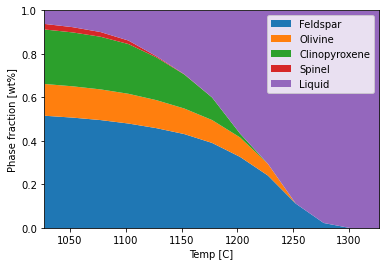

In [20]:
phase_frac.plot.area(lw=0)
plt.legend(loc='upper right')
plt.xlabel('Temp [C]')
plt.ylabel('Phase fraction [wt%]')
plt.xlim(phase_frac.index[[-1,0]])
plt.ylim(0,1)

(1026.85, 1326.85)

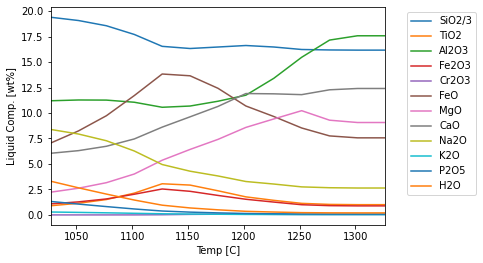

In [21]:
liq_comp.plot()
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel('Temp [C]')
plt.ylabel('Liquid Comp. [wt%]')
plt.xlim(phase_frac.index[[-1,0]])



## Retrieve final Geo-relevant Compositions

In [22]:
print('T = ', state.temperature)
print('P = ', state.pressure)

T =  1300.0
P =  1000.0


In [23]:
X_fsp = state.compositions(phase_name='Feldspar',  ctype='components', units='mole_frac')
print('Feldspar:')
print('X_fsp = ')
display(X_fsp)

Feldspar:
X_fsp = 


array([0.34977646, 0.64880775, 0.00141579])

In [24]:
X_spl = state.compositions(phase_name='Spinel',  ctype='components', units='mole_frac')
print('Spinel:')
print('X_spl = ')
display(X_spl)

Spinel:
X_spl = 


array([ 0.02303716, -0.30059573,  0.2486363 ,  0.36282285,  0.66609942])

In [25]:
X_cpx = state.compositions(phase_name='Clinopyroxene',  ctype='components', units='mole_frac')
print('Clinopyroxene:')
print('X_cpx = ')
display(X_cpx)

Clinopyroxene:
X_cpx = 


array([ 0.45232238,  0.17056242,  0.23701685,  0.07978534, -0.01092643,
        0.04901947,  0.02221997])